<a href="https://colab.research.google.com/github/Shaheer04/KMeans_Clustering/blob/main/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
dataset = pd.read_csv('/content/force2020_data_unsupervised_learning.csv', index_col = 'DEPTH_MD')

In [4]:
dataset

,RHOB,GR,NPHI,PEF,DTC
DEPTH_MD,,,,,
494.528,1.884186,80.200851,NaN,20.915468,161.131180
494.680,1.889794,79.262886,NaN,19.383013,160.603470
494.832,1.896523,74.821999,NaN,22.591518,160.173615
494.984,1.891913,72.878922,NaN,32.191910,160.149429
495.136,1.880034,71.729141,NaN,38.495632,160.128342
...,...,...,...,...,...
3271.416,2.630211,19.418915,0.187811,NaN,NaN
3271.568,2.643114,21.444370,0.185574,NaN,NaN
3271.720,2.681300,22.646879,0.176074,NaN,NaN


In [5]:
dataset.isnull().sum()

RHOB       0
GR         0
NPHI    4238
PEF     1830
DTC       81
dtype: int64

In [6]:
dataset.dropna(inplace=True)

In [7]:
dataset

,RHOB,GR,NPHI,PEF,DTC
DEPTH_MD,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085
...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836


In [8]:
dataset.describe()

,RHOB,GR,NPHI,PEF,DTC
count,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000
mean,2.149947,61.253852,0.414572,3.912313,121.409905
std,0.251592,29.902708,0.139207,1.816933,30.394369
min,1.493417,6.191506,0.037976,1.126667,55.726753
25%,1.983767,42.792794,0.313797,2.629141,89.977041
50%,2.059335,62.886322,0.466891,3.365132,138.477173
75%,2.389839,77.726776,0.513840,4.686422,146.242302
max,2.889454,499.022583,0.800262,17.026619,163.910797


Standardzing the Data

In [9]:
scaler = StandardScaler()

In [11]:
dataset[['RHOB_T', 'GR_T', 'NPHI_T', 'PEF_T', 'DTC_T']] = scaler.fit_transform(dataset[['RHOB', 'GR', 'NPHI', 'PEF', 'DTC']])
dataset

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,GR_T,NPHI_T,PEF_T,DTC_T
DEPTH_MD,,,,,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,-1.491843,-0.179292,2.523654,-1.255364,0.869531
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,-1.387067,-0.010859,2.770744,-1.247886,0.690042
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,-1.320646,0.028875,2.524300,-1.247450,0.554350
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,-1.274390,-0.008126,2.068584,-1.261572,0.585297
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,-1.335919,-0.092056,1.617342,-1.325067,0.752808
...,...,...,...,...,...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564,1.265151,0.979338,-0.524699,0.433103,-1.149449
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599,1.222550,0.921870,-0.456081,0.433103,-1.158891
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836,1.110101,1.032560,-0.356250,0.433103,-1.105910


Identifying the Number of Clusters using a method called Elbow-plot

In [16]:
#create a function to workout optimum number of clusters

def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
      kmeans = KMeans(n_clusters=k)
      kmeans.fit(data)

      means.append(k)
      inertias.append(kmeans.inertia_)

    #Generate the elbow plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

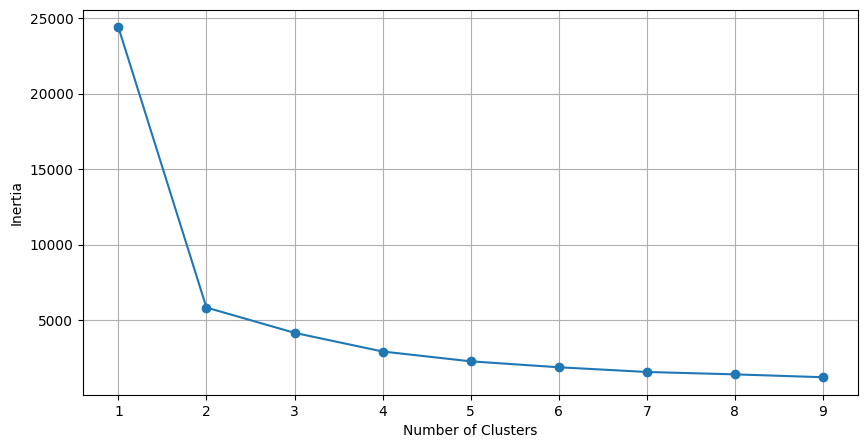

In [17]:
optimise_k_means(dataset[['RHOB_T','NPHI_T']], 10)

In [18]:
kmeans = KMeans(n_clusters=3)

In [19]:
kmeans.fit(dataset[['NPHI_T', 'RHOB_T']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [20]:
dataset['kmeans_3'] = kmeans.labels_
dataset

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,GR_T,NPHI_T,PEF_T,DTC_T,kmeans_3
DEPTH_MD,,,,,,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,-1.491843,-0.179292,2.523654,-1.255364,0.869531,0
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,-1.387067,-0.010859,2.770744,-1.247886,0.690042,0
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,-1.320646,0.028875,2.524300,-1.247450,0.554350,0
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,-1.274390,-0.008126,2.068584,-1.261572,0.585297,0
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,-1.335919,-0.092056,1.617342,-1.325067,0.752808,0
...,...,...,...,...,...,...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564,1.265151,0.979338,-0.524699,0.433103,-1.149449,1
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599,1.222550,0.921870,-0.456081,0.433103,-1.158891,1
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836,1.110101,1.032560,-0.356250,0.433103,-1.105910,1


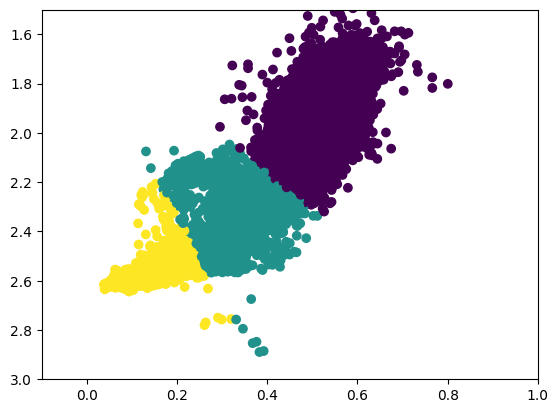

In [21]:
plt.scatter(x=dataset['NPHI'], y=dataset['RHOB'], c=dataset['kmeans_3'])
plt.xlim(-0.1, 1)
plt.ylim(3,1.5)
plt.show()

Creating Multiple Clusters

In [22]:
for k in range(1,6):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(dataset[['RHOB_T','NPHI_T']])
    dataset[f'KMeans_{k}'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [23]:
dataset

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,GR_T,NPHI_T,PEF_T,DTC_T,kmeans_3,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5
DEPTH_MD,,,,,,,,,,,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,-1.491843,-0.179292,2.523654,-1.255364,0.869531,0,0,0,0,0,0
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,-1.387067,-0.010859,2.770744,-1.247886,0.690042,0,0,0,0,0,0
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,-1.320646,0.028875,2.524300,-1.247450,0.554350,0,0,0,0,0,0
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,-1.274390,-0.008126,2.068584,-1.261572,0.585297,0,0,0,0,0,0
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,-1.335919,-0.092056,1.617342,-1.325067,0.752808,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564,1.265151,0.979338,-0.524699,0.433103,-1.149449,1,0,1,1,2,1
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599,1.222550,0.921870,-0.456081,0.433103,-1.158891,1,0,1,1,2,1
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836,1.110101,1.032560,-0.356250,0.433103,-1.105910,1,0,1,1,2,1


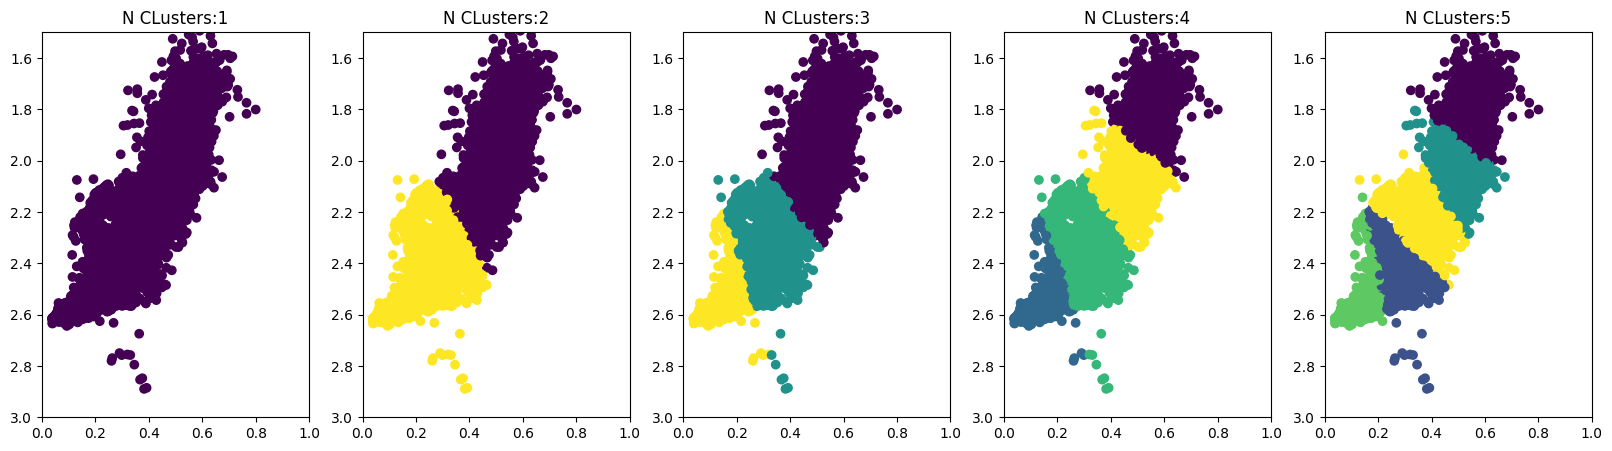

In [27]:
fig, axs = plt.subplots(nrows=1,ncols=5,figsize=(20,5))

for i, ax in enumerate(fig.axes, start=1):
  ax.scatter(x=dataset['NPHI'], y=dataset['RHOB'], c=dataset[f'KMeans_{i}'])
  ax.set_ylim(3,1.5)
  ax.set_xlim(0,1)
  ax.set_title(f'N CLusters:{i}')